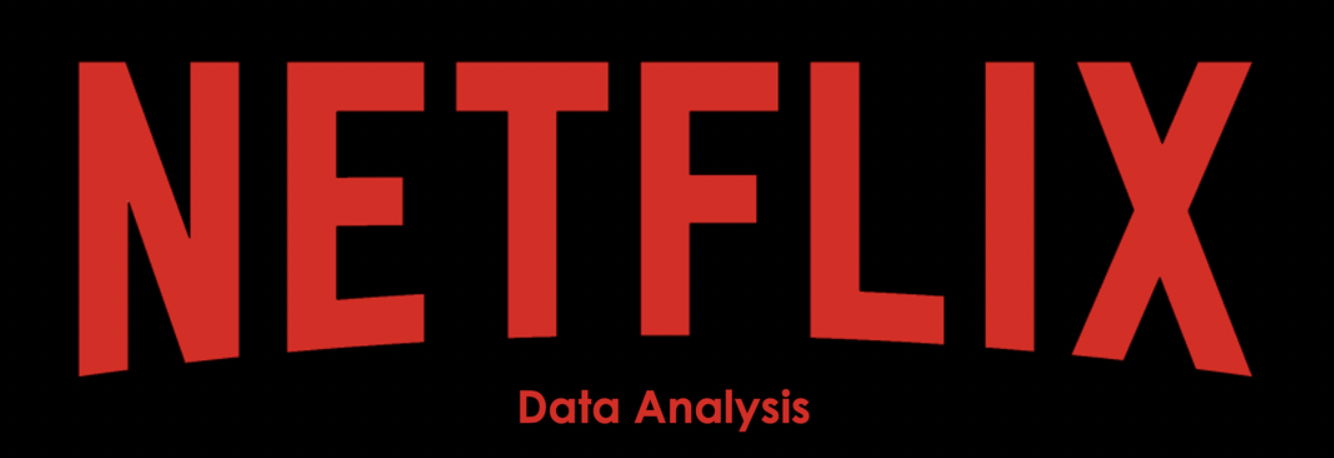

Over the past two decades, streaming platforms like Netflix have transformed how we access entertainment. This has led to an explosion in content variety, catering to diverse viewer preferences.  As user tastes and viewing habits evolve, the number of movies and TV shows released each year also fluctuates. By analyzing the Netflix dataset, we can explore these trends in release frequency and get insights related to genre, release date, and other factors.

`Problem Statement:`

The problem statement involves analyzing a Netflix dataset to extract insights using visualizations and recommend actionable items for business based on data available on various attributes such as type, title, director, cast, country, date added, release year, rating, duration, listed in and description.

`Analyzing Basic Metrics:`

`1. Data Types:`

- Categorical data: type, director, country, rating, listed_in, duration (minutes/seasons)
- Numerical data: release year
- Text data: show_id, title, cast information, description
- Datetime: date_added

`2. Central Tendency:` - Calculate metrics like mean, median, and mode to understand 'average' values.

`3. Spread:` - Metrics like standard deviation and range show how data points are distributed around the central tendency.

`4. Frequency:` - Analyze how often specific values appear. You could see the frequency of different countries represented in the dataset, identifying content origin trends.

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset
data = pd.read_csv("netflixdata.csv")
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


`Basic Observations:`

In [3]:
print(f"The dataset is of {data.ndim}-dimensions.")

The dataset is of 2-dimensions.


In [4]:
print(f"The dataset has {data.shape[0]} rows and {data.shape[1]} columns.")

The dataset has 8807 rows and 12 columns.


In [5]:
print(f"The dataset consists of {data.size} elements.")

The dataset consists of 105684 elements.


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
#Basic statistical summary of numerical columns:

data.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,8807.0,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0


In [8]:
#Basic analysis of categorical columns:

data.describe(include = 'object').T

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


In [9]:
print("DataTypes of each columns:")
data.dtypes

DataTypes of each columns:


show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [10]:
print("Number of unique values in each columns:")
for column in data.columns:
    print(f"{column} : {data[column].nunique()}")

Number of unique values in each columns:
show_id : 8807
type : 2
title : 8807
director : 4528
cast : 7692
country : 748
date_added : 1767
release_year : 74
rating : 17
duration : 220
listed_in : 514
description : 8775


In [11]:
print("Number of null values in each columns:")
data.isnull().sum()

Number of null values in each columns:


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [12]:
#checking for duplicate entries in datatset and in 'show_id' column:
data[data.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [13]:
data[data.duplicated('show_id')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


`Comments:` There is NO duplicate entries in datatset and in 'show_id' column.

`Pre-Processing`

In [14]:
#dropping 'description' columns as it isn't of much use
data = data.drop(['description'], axis = 1)
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

`Missing Values and Outliers check`

In [15]:
#null rates of each columns:
print("For columns with null values, below are it's null rate:")
for i in data.columns:
    null_rate = data[i].isnull().sum()/len(data)*100
    if null_rate > 0:
        print(f"{i} : {round(null_rate,2)}%")

For columns with null values, below are it's null rate:
director : 29.91%
cast : 9.37%
country : 9.44%
date_added : 0.11%
rating : 0.05%
duration : 0.03%


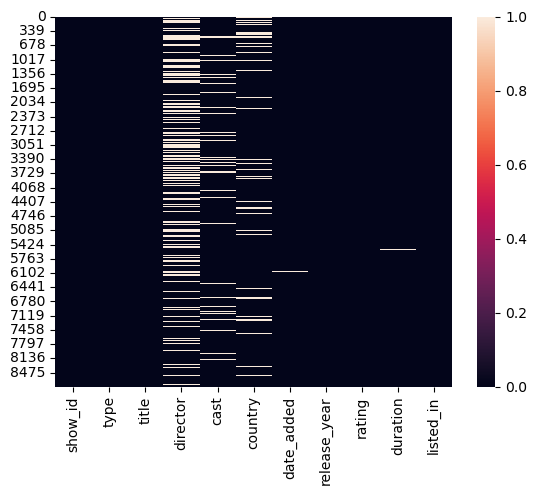

In [16]:
sns.heatmap(data.isnull())
plt.show()

`Comments:` Total of 6 columns have missing values, with 'director' column having highest null rate compared to other columns.

`Handling Missing Data:`

This is a scenario based action. Given the nature of analysis, these missing values may or may not significantly impact the outcome. However, in this case, we'll:
- replace 'director' and 'cast' columns null values will 'No Data' string.
- fill 'country' column's null values with most common country.
- remove rows with missing values in 'date_added', 'rating', and 'duration' as the missing rate is negligible.

In [17]:
#handling missing values:
data['director'].replace(np.nan, 'No Data', inplace  = True)
data['cast'].replace(np.nan, 'No Data', inplace  = True)
data['country'] = data['country'].fillna(data['country'].mode()[0])

# Drops
data.dropna(subset = ['date_added','rating','duration'], inplace = True)

# Drop Duplicates
data.drop_duplicates(inplace = True)

In [18]:
#verifying after cleanup
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

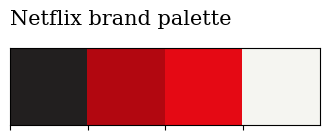

In [19]:
#Creating a customized palette that aligns with Netflix's brand colors will maintain visual uniformity in our data visualizations

sns.palplot(['#221f1f', '#b20710', '#e50914','#f5f5f1'])
plt.title("Netflix brand palette ", loc = 'left', fontfamily = 'serif', fontsize = 15, y = 1.2)
plt.show()

`Outliers Check`

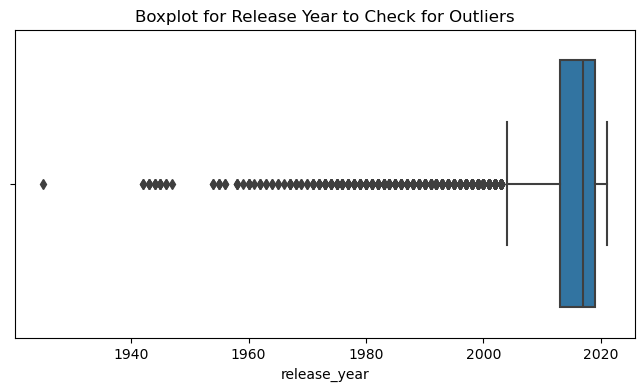

In [38]:
# Boxplot to check for outliers in 'release_year' as its the primary numerical column
plt.figure(figsize=(8, 4))
sns.boxplot(data = data, x = "release_year")
plt.title('Boxplot for Release Year to Check for Outliers')
plt.show()

`Comments:` The boxplot reveals a consistent spread of release years, with no significant data points falling outside the expected range.

In [21]:
#conversion of categorical column to dtype 'category'
data['type'] = data['type'].astype('category')
data['rating'] = data['rating'].astype('category')
data['country'] = data['country'].astype('category')

In [22]:
#converting date_added from 'object' dtype to 'datetime' dtype
data['date_added'] = data['date_added'].str.replace(' ','')
data['date_added'] = pd.to_datetime(data['date_added'], format='%B%d,%Y')

In [39]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,month_name_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,September,2021
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",September,2021
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",September,2021
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",September,2021


In [23]:
data.dtypes

show_id                 object
type                  category
title                   object
director                object
cast                    object
country               category
date_added      datetime64[ns]
release_year             int64
rating                category
duration                object
listed_in               object
dtype: object

`Comments:`

- Data Types of all the Attributes - Most of the attributes are of object data type before conversion, except release_year, which is an int64 type.
- Conversion of Categorical Attributes to ‘Category’ - The data types for type, country, and rating columns have been converted to category.
- Conversion of date column to 'DateTime' - The data type of date_added column have been converted to datatime64.

In [24]:
#extracting month_name and year from date_added columb
data['month_name_added'] = data['date_added'].dt.month_name()
data['year_added'] = data['date_added'].dt.year

In [25]:
#Non-Graphical Analysis: Value counts for key attributes

value_counts = {col: data[col].value_counts() for col in data.columns}

print("Type counts:", value_counts['type'], "\n")
print("Top 10 countries:", value_counts['country'].head(10), "\n")
print("Rating counts:", value_counts['rating'], "\n")
print("Top 10 release years:", value_counts['release_year'].head(10))

Type counts: type
Movie      6126
TV Show    2664
Name: count, dtype: int64 

Top 10 countries: country
United States     3638
India              972
United Kingdom     418
Japan              243
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64 

Rating counts: rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64 

Top 10 release years: release_year
2018    1146
2017    1030
2019    1030
2020     953
2016     901
2021     592
2015     555
2014     352
2013     286
2012     236
Name: count, dtype: int64


In [26]:
# Unique attributes for key columns

unique_values = {col: data[col].unique() for col in ['type', 'country', 'rating', 'release_year']}

print("Unique values in 'type' :", unique_values['type'], "\n")
print("Unique values in 'country' :", unique_values['country'], "\n")
print("Unique values in 'rating' :", unique_values['rating'], "\n")
print("Unique values in 'release_year' :", unique_values['release_year'])

Unique values in 'type' : ['Movie', 'TV Show']
Categories (2, object): ['Movie', 'TV Show'] 

Unique values in 'country' : ['United States', 'South Africa', 'India', 'United States, Ghana, Burkina Faso, United Ki..., 'United Kingdom', ..., 'Russia, Spain', 'Croatia, Slovenia, Serbia, Montenegro', 'Japan, Canada', 'United States, France, South Korea, Indonesia', 'United Arab Emirates, Jordan']
Length: 748
Categories (748, object): [', France, Algeria', ', South Korea', 'Argentina', 'Argentina, Brazil, France, Poland, Germany, D..., ..., 'Venezuela, Colombia', 'Vietnam', 'West Germany', 'Zimbabwe'] 

Unique values in 'rating' : ['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', ..., 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR']
Length: 14
Categories (14, object): ['G', 'NC-17', 'NR', 'PG', ..., 'TV-Y', 'TV-Y7', 'TV-Y7-FV', 'UR'] 

Unique values in 'release_year' : [2020 2021 1993 2018 1996 1998 1997 2010 2013 2017 1975 1978 1983 1987
 2012 2001 2014 2002 2003 2004 2011 2008 2009 2007 2005 2006 1994 2015

`Comments:`

- Content Mix: Movies dominate the platform, nearly doubling the number of TV shows available.
- Production Landscape: The US leads content production, followed by India and the UK.
- Target Audience: The prevalence of "TV-MA" and "TV-14" ratings suggests a focus on mature and teen audiences.
- Content Freshness: The concentration of content from 2018-2019 highlights a preference for recent releases.

Q1. Let’s start by understanding the distribution of Movies vs. TV Shows on Netflix.

type
Movie      6126
TV Show    2664
Name: count, dtype: int64
[6126 2664] CategoricalIndex(['Movie', 'TV Show'], categories=['Movie', 'TV Show'], ordered=False, dtype='category', name='type')




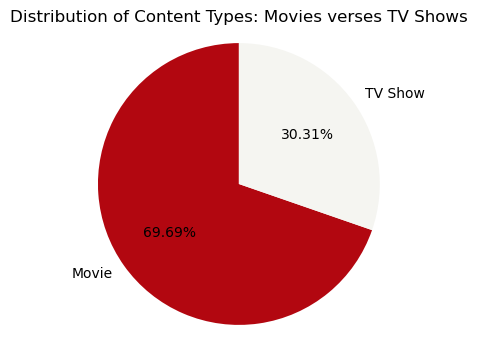

In [60]:
# Univariate Analysis
# Pie Chart for 'Type' (Movie/TV Show)

type_counts = data['type'].value_counts()
print(type_counts)
label = type_counts.index
size = type_counts.values
print(size, label)
colors = ['#b20710', '#f5f5f1']

print("\n")
plt.figure(figsize = (4,4))
plt.pie(size, labels = label, autopct = '%1.2f%%', startangle = 90, colors = colors)
plt.title('Distribution of Content Types: Movies verses TV Shows')
plt.axis('equal')
plt.show()

Observations:
The count of Movies is significantly higher than that of TV Shows, indicating that Netflix has a more extensive catalog of movies.

Q2. What is the best time to launch a TV show?

month_name_added
December     265
July         262
September    251
August       236
June         236
October      215
April        214
March        213
November     207
May          193
January      192
February     180
Name: month_name_added, dtype: int64
Index(['December', 'July', 'September', 'August', 'June', 'October', 'April',
       'March', 'November', 'May', 'January', 'February'],
      dtype='object', name='month_name_added')
[265 262 251 236 236 215 214 213 207 193 192 180]


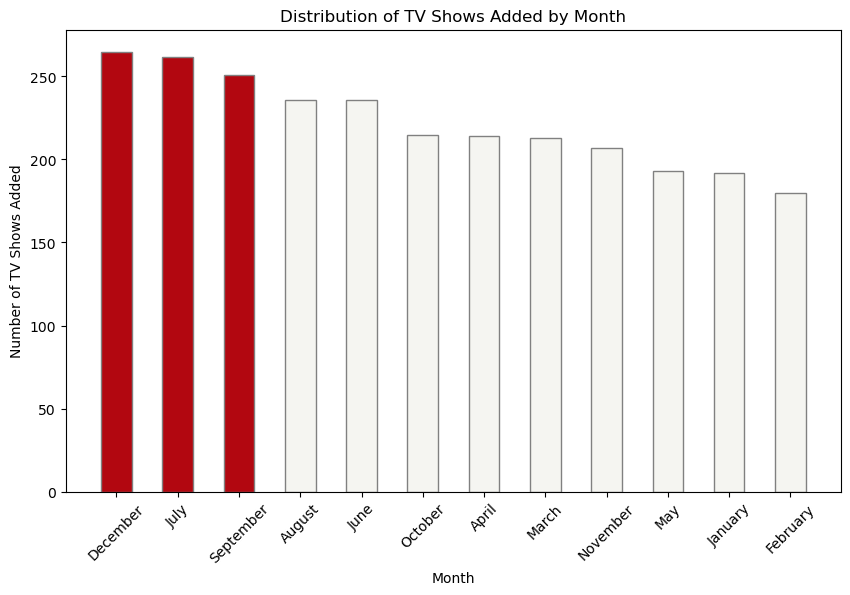

In [45]:
# Bivarate Analysis
# Bar chart for Distribution on TV Shows and Month Added

tv_show_monthly_additions = data[data['type'] == 'TV Show'].groupby('month_name_added')['month_name_added'].count().sort_values(ascending=False)
print(tv_show_monthly_additions)
print(tv_show_monthly_additions.index)
print(tv_show_monthly_additions.values)
color_map = ['#f5f5f1' for _ in range(12)]
color_map[0] = color_map[1] = color_map[2] =  '#b20710'

plt.figure(figsize = (10, 6))
plt.bar(tv_show_monthly_additions.index, tv_show_monthly_additions, width = 0.5, edgecolor = 'Grey', color = color_map)
plt.title('Distribution of TV Shows Added by Month')
plt.xlabel('Month')
plt.ylabel('Number of TV Shows Added')
plt.xticks(rotation = 45)
plt.show()

`Comments:` Looking at the data, it seems most TV shows came out in the last two parts of the year (fall and winter). This includes December, July, and September as top 3 months. While this might suggest launching in these months, it's crucial to consider other factors as well like genre, viewership patterns, festive/holiday months and marketing strategies to determine the optimal launch time of TV Shows.

Q3. Understanding the trends in the distribution of content ratings.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


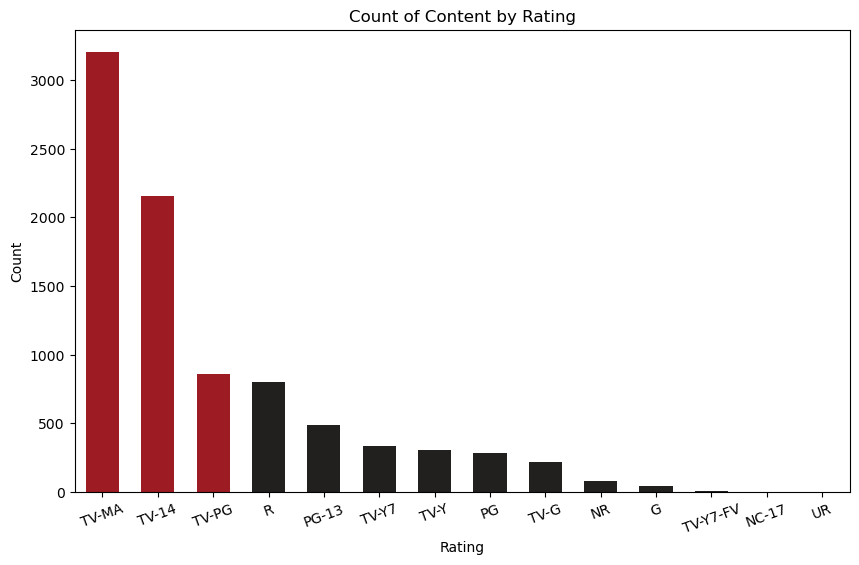

In [29]:
# Univariate Analysis
# Countplot for Rating
color_map = ['#221f1f' for _ in range(13)]
color_map[0] = color_map[1] = color_map[2] =  '#b20710'

print("\n")
plt.figure(figsize=(10, 6))
sns.countplot(x = 'rating', data = data, order = data['rating'].value_counts().index, palette = color_map, width=0.6)
plt.title('Count of Content by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation = 20)
plt.show()

`Comments:` The content leans towards mature audiences - 17+ age (TV-MA), followed by teenagers - 14+ age (TV-14).

Q4. Is there a trend of releases increasing or decreasing over time?

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


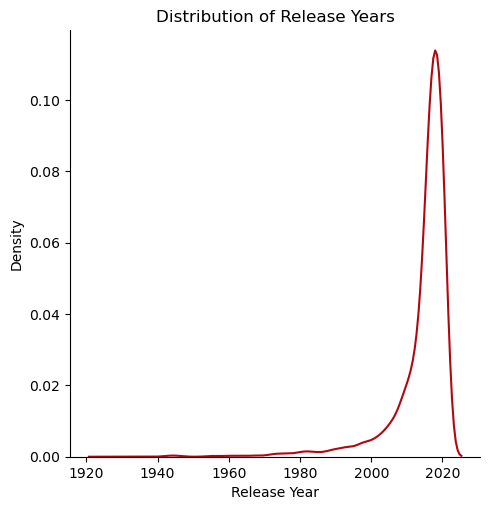

In [48]:
# Using Displot for release_year

sns.displot(data['release_year'], kind = 'kde', color = '#b20710')
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Density')
plt.show()

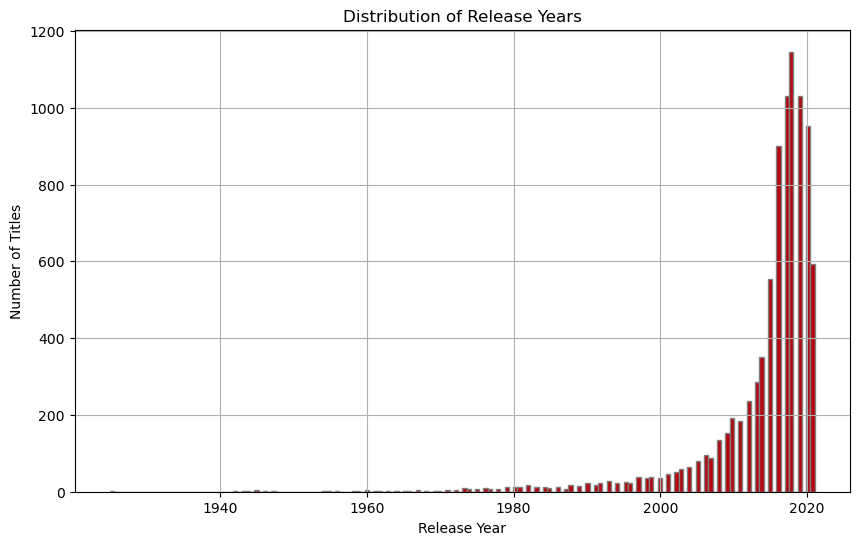

In [49]:
# Using Histogram for release_year

plt.figure(figsize=(10, 6))
plt.hist(data['release_year'], bins = 'auto', edgecolor = 'Grey', color = '#b20710')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.title('Distribution of Release Years')
plt.grid(True)
plt.show()

`Comments:` The right-skewed distribution of release years indicates a focus on newer content on Netflix. This might be relevant when considering factors like content relevance and user preferences.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


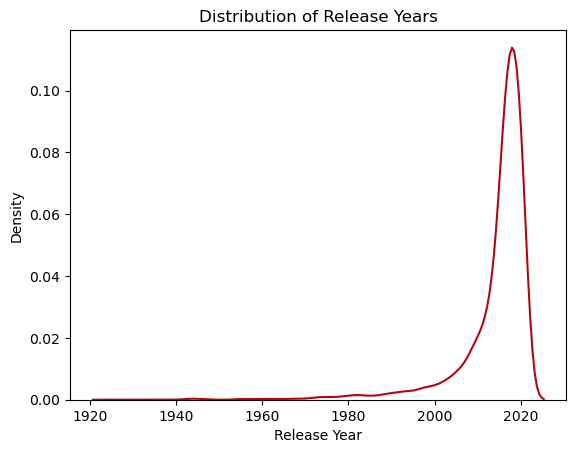

In [51]:
# Using Displot for release_year

sns.kdeplot(data['release_year'], color = '#b20710')
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Density')
plt.show()

Q5. How does the popularity of releases vary across different years?

release_year
2018    1146
2017    1030
2019    1030
2020     953
2016     901
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: count, Length: 74, dtype: int64


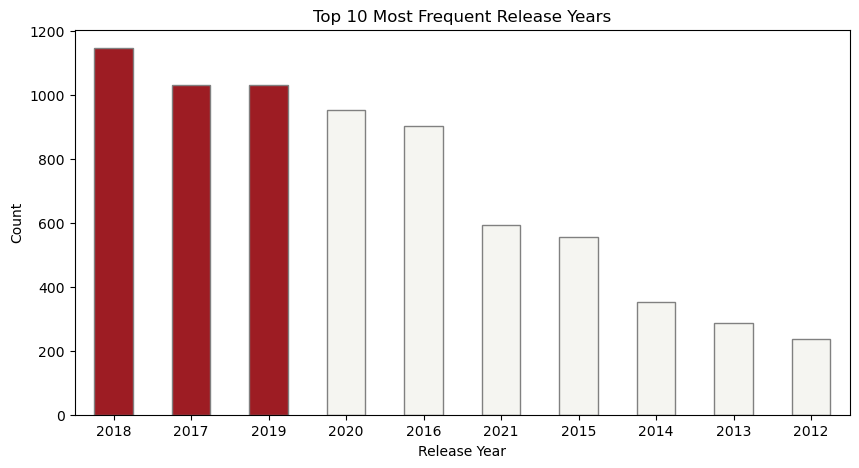

In [32]:
# Countplot for top 10 release years
print(data['release_year'].value_counts())
color_map = ['#f5f5f1' for _ in range(13)]
color_map[0] = color_map[1] = color_map[2] = '#b20710'

plt.figure(figsize = (10, 5))
sns.countplot(data = data, x = 'release_year', order = data['release_year'].value_counts().iloc[:10].index, palette = color_map, width=0.5, edgecolor = 'Grey')
plt.title('Top 10 Most Frequent Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

`Comments:` The plot shows the top 10 most frequent release years in the data. 2018 appears to have the most content.

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


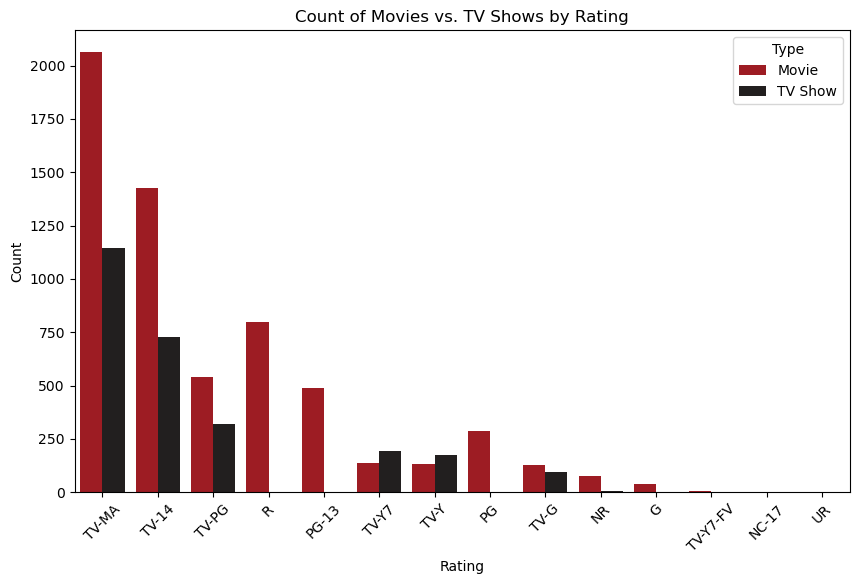

In [33]:
# Bivariate Analysis
# Relationship Between Type and Rating

print(data['rating'].value_counts())
color_map = ['#b20710','#221f1f']  
plt.figure(figsize = (10, 6))
sns.countplot(x = 'rating', hue = 'type', data = data, order = data['rating'].value_counts().index, palette = color_map)
plt.title('Count of Movies vs. TV Shows by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.legend(title = 'Type')
plt.show()

`Comments:` Both Movies and TV Shows predominantly fall under mature audiences (TV-MA) i.e., 17+ age, followed by teenagers (TV-14) i.e., 14+ age.

Q6. Which directors have the most titles available on Netflix?

director
No Data                   2621
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Jay Chapman                 12
Youssef Chahine             12
Name: count, dtype: int64


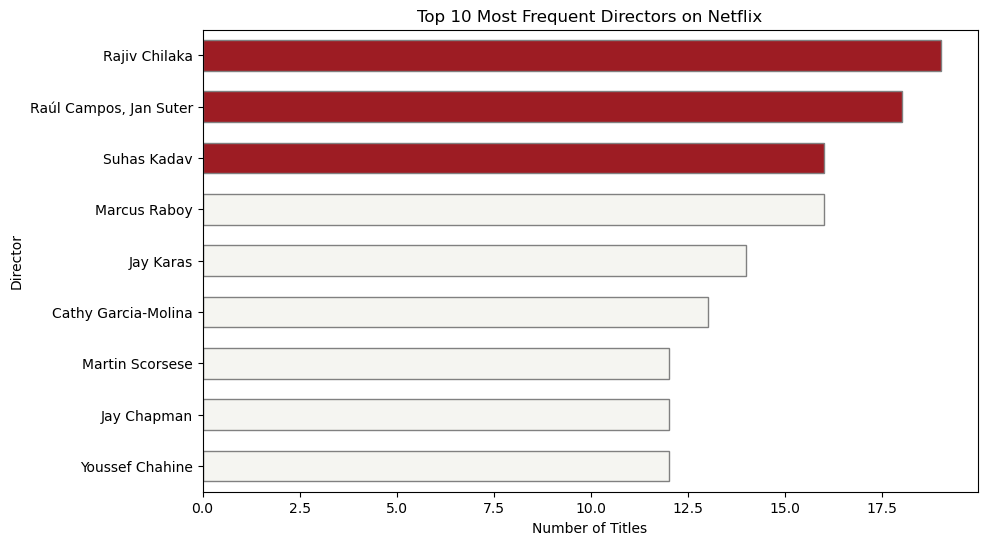

In [34]:
# Bivariate Analysis
# Top 10 directors with the most titles on Netflix:
director_counts = data['director'].value_counts().head(10)  # Count director occurrences
print(director_counts)
top_directors = director_counts[1:].head(10) # get the top 10 directors (excluding the first since its missing values replaced with 'No Data' string)

color_map = ['#f5f5f1' for _ in range(13)]
color_map[0] = color_map[1] = color_map[2] =  '#b20710'

# Visualizing the top 10 directors with a bar chart
plt.figure(figsize = (10, 6))
sns.barplot(y = top_directors.index, x = top_directors.values, palette = color_map, edgecolor = 'Grey', width = 0.6)
plt.title('Top 10 Most Frequent Directors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

`Comments:` Excluding the 'No Data' entries, there seems to be a long-tail distribution for directors. A small number of directors have many titles, while a large number of directors have only a few titles. Rajiv Chilaka has the most titles (19) followed by a drop to 18 and then 16 for the subsequent directors.

Q7. Which countries have produced the most Movies/TV Shows?

country         type   
United States   Movie      2494
                TV Show    1144
India           Movie       893
United Kingdom  TV Show     212
                Movie       206
Japan           TV Show     167
South Korea     TV Show     158
Canada          Movie       122
Spain           Movie        97
Egypt           Movie        92
Name: count, dtype: int64


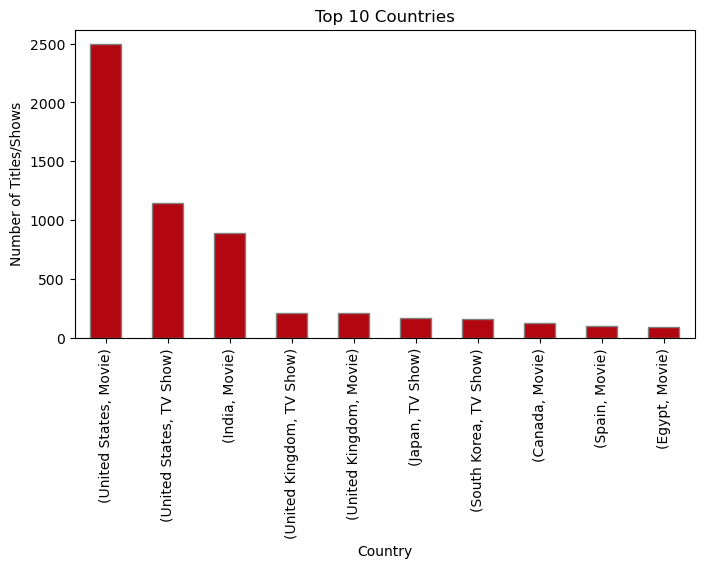

In [35]:
# Bivariate Analysis
top_10_countries = data.groupby(['country', 'type'], observed=False)['country'].value_counts().sort_values(ascending=False).iloc[0:10]
print(top_10_countries)

plt.figure(figsize=(8, 4))
top_10_countries.plot(x='country', y='country', kind='bar', color = '#b20710', edgecolor = 'Grey', width = 0.5)
plt.title("Top 10 Countries")
plt.xlabel("Country")
plt.ylabel("Number of Titles/Shows")
plt.xticks(rotation=90)
plt.show()

`Comments:` The United States has the most Movie and TV Shows, followed by India for Movies and the United Kingdom.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


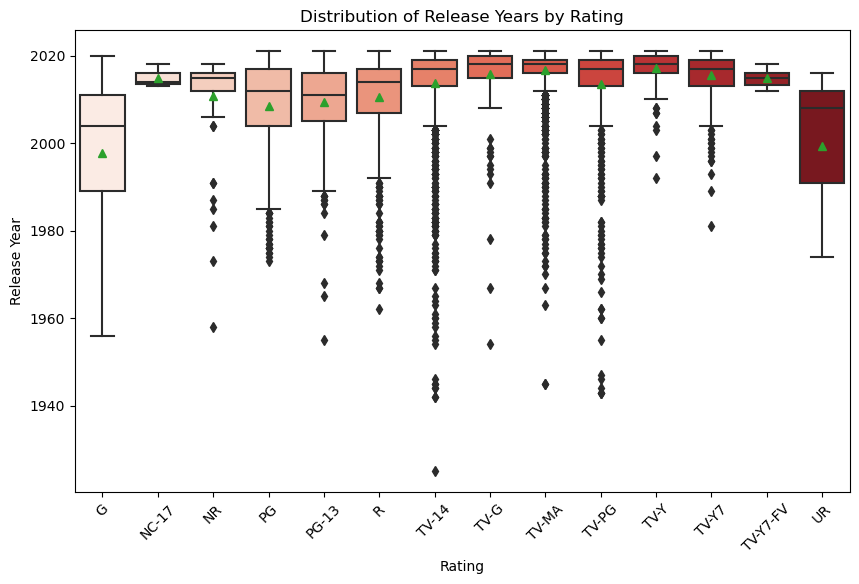

In [53]:
# Bivariate Analysis
# Boxplot for rating Vs release_year
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'rating', y = 'release_year', showmeans = True, data = data, palette='Reds')
plt.title('Distribution of Release Years by Rating')
plt.xlabel('Rating')
plt.ylabel('Release Year')
plt.xticks(rotation = 45)
plt.show()

`Comments:`
The boxplot shows that the median release year for most ratings is relatively recent.
Content with ratings TV-Y and TV-Y7 tends to be older compared to other ratings.

`Pairplot for Continuous Variables`

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


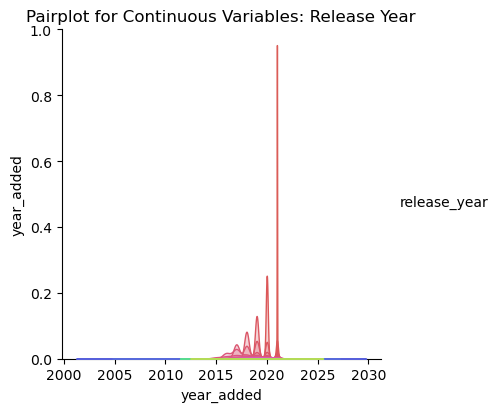

In [54]:
sns.pairplot(data, hue='release_year', palette='hls', height=4, aspect=1)
plt.title('Pairplot for Continuous Variables: Release Year')
plt.show()

`Comments`: There seems to be a slight positive trend in the distribution of release years across the diagonal plots. This suggests that newer movies might be slightly more common in the data.

`Data-Backed Business Insights:`

1. Global Appeal through Content Diversity:

- Key Finding: Netflix boasts a diverse content library featuring productions from a staggering 748 countries and encompassing a wide range of genres.  The top contributors are the United States (3638 titles), India (972 titles), and the United Kingdom (418 titles).

- Business Implication: This geographic and genre-based variety positions Netflix well to cater to a global audience with diverse preferences. This translates to a significant advantage for subscriber acquisition and retention.

2. Prioritizing Fresh Content:

- Key Finding: A substantial portion of Netflix's content library is recent.  In fact, content released in 2018, 2017, and 2019 collectively represents 3,206 titles, or roughly 36.4% of the entire catalog.  Additionally, TV shows tend to have more recent median release years compared to movies.

- Business Implication: This focus on newer content likely reflects current viewer preferences for fresh and relevant material. It also demonstrates Netflix's commitment to maintaining an up-to-date library, a crucial factor in subscriber engagement and attracting new viewers.

3. Targeting Mature and Teen Audiences:

- Key Finding: Content with "TV-MA" and "TV-14" ratings dominates Netflix, with 3205 and 2157 titles respectively.  Combined, these two ratings make up approximately 61.2% of the total content.

- Business Implication: The prevalence of these ratings suggests that Netflix's primary target audience skews towards mature and teen demographics. Tailoring content strategies towards these groups is likely to be more successful.

`Data-Backed Recommendations:`

1. Expand Classic TV Show Library:
- Our data reveals a focus on newer TV shows, with a median release year much later than movies. Only around 10% of TV shows predate 2000.
- Recommendation:  By adding more classic TV shows, Netflix can attract a wider audience, including older viewers who might enjoy revisiting past favorites.

2. Enhance Regional Content Customization:
- While content from the US, India, and the UK makes up nearly half of Netflix's library, there's a vast opportunity for further regionalization.
- Recommendation: With content from 748 countries, Netflix can tailor its offerings based on regional popularity. This could significantly increase local subscriptions and customer satisfaction.

3. Explore Genre and Rating Diversity:
- Our analysis shows that "TV-MA" and "TV-14" ratings dominate the library, accounting for 61.2% of all content. Genres like documentaries and children's movies are less frequent.
- Recommendation:  By expanding into underrepresented genres and ratings, Netflix can attract a more diverse audience with a wider range of viewing preferences.

4. Optimize Seasonal Releases:
- Data indicates a significant increase in TV show additions during December and January, suggesting peak new release months.
- Recommendation:  Leveraging this seasonal trend, Netflix can strategically release highly-anticipated new seasons or exclusive content during these peak months to capitalize on increased viewership.